In [52]:
#Imporaremos las librerias Pandas, Numpy, Matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

# **Extracción del Archivo Tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X.
Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [53]:
datos = pd.read_csv('/content/Datos/df_plano.csv')

In [54]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [55]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [56]:
#**Exploracion de los datos (Variables Categoricas y Numericas** conteo de cada una de las categorias de cada una de estas varibales
#Para ellos usamos un Histograma

In [57]:
import plotly.express as px

In [58]:
#Realizaremos un pequeño Histograma de cuantas personas Cancelaron o mejor dicho han pagado los sevicios
px.histogram(datos, x='Churn',text_auto=True)

tenure: tiempo en meses como cliente.
TotalCharges: lo que ha pagado en total.
Churn: si canceló ("Yes") o no ("No").

In [59]:
#Veremos cuantos clientes son dependientes (Cuantos clientes dependiente han pagado y cuantos No)
px.histogram(datos, x='customer.Dependents',text_auto=True,color='Churn',barmode='group')

# **Conociendo las variable Numericas**
- customer.SeniorCitizen
- customer.tenure
- account.Charges.Monthly
- account.Charges.Total
- cuentas_Diarias

In [60]:
#Veremos la estadisitica discistiva de nuestros datos nuemricos (Tenure = antiguedad de los clientes)
px.box(datos, x='customer.tenure', color='Churn')

# **Eliminación de Columnas Irrelevantes **
Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores
únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso
perjudicar el desempeño de los modelos.

In [61]:
#Vamos a borrar la Columna customerID
datos.drop('customerID', axis=1, inplace=True)

In [62]:
#Vamos a definir nuestra variable explicativa con X y la variable respuesta y
X = datos.drop('Churn',axis=1)
y = datos['Churn']

In [63]:
X

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7039,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7040,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [64]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7038,No
7039,Yes
7040,No
7041,No


# Encoding **
Transformacion de los datos de las variables explicativas a un formato numerico ya que los modelo de Machine Learning puedan entenderlo
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.
Utiliza un método de codificación adecuado, como one-hot encoding.

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [66]:
columnas = X.columns

In [67]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['customer.gender','customer.Partner','customer.Dependents','phone.PhoneService',
                                                                   'phone.MultipleLines','internet.InternetService','internet.OnlineSecurity',
                                                                   'internet.OnlineBackup','internet.DeviceProtection',
                                                                   'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
                                                                   'account.Contract','account.PaperlessBilling','account.PaymentMethod']),remainder ='passthrough',
                                                                     sparse_threshold=0,force_int_remainder_cols = False) #en la versiones mas nueva despues de sparse_threshold=0, force_int_remainder_cols = False

In [68]:
X = one_hot.fit_transform(X)

In [69]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehoten

In [70]:
#Resultado de la transformacion de las varibales explicativas
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__Cuentas_Diarias
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90,1.838333
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.836667
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.676667
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,2.261667


In [71]:
#Transformacion de la Variable respuesta
from sklearn.preprocessing import LabelEncoder

In [72]:
label_encoder = LabelEncoder()

In [73]:
y = label_encoder.fit_transform(y)

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
#Ajustando Modelos (Datos de Entrenamiento y Prueba
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

In [77]:
#Modelo de referencia o Baseline
from sklearn.dummy import DummyClassifier

In [78]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test, y_test)

0.7348097671777399

# **Creación de Modelos**

In [79]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier

In [80]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [81]:
modelo_arbol.score(X_test,y_test)

0.7223168654173765

In [82]:
#Vamos a graficar nuestro modelo
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [83]:
valores_columnas = [
'Male',
'Famale',
'Yes',
'No',
'No phone service',
'DSL',
'Fiber optic',
'No internet service',
'One year',
'Month-to-month',
'Two year']

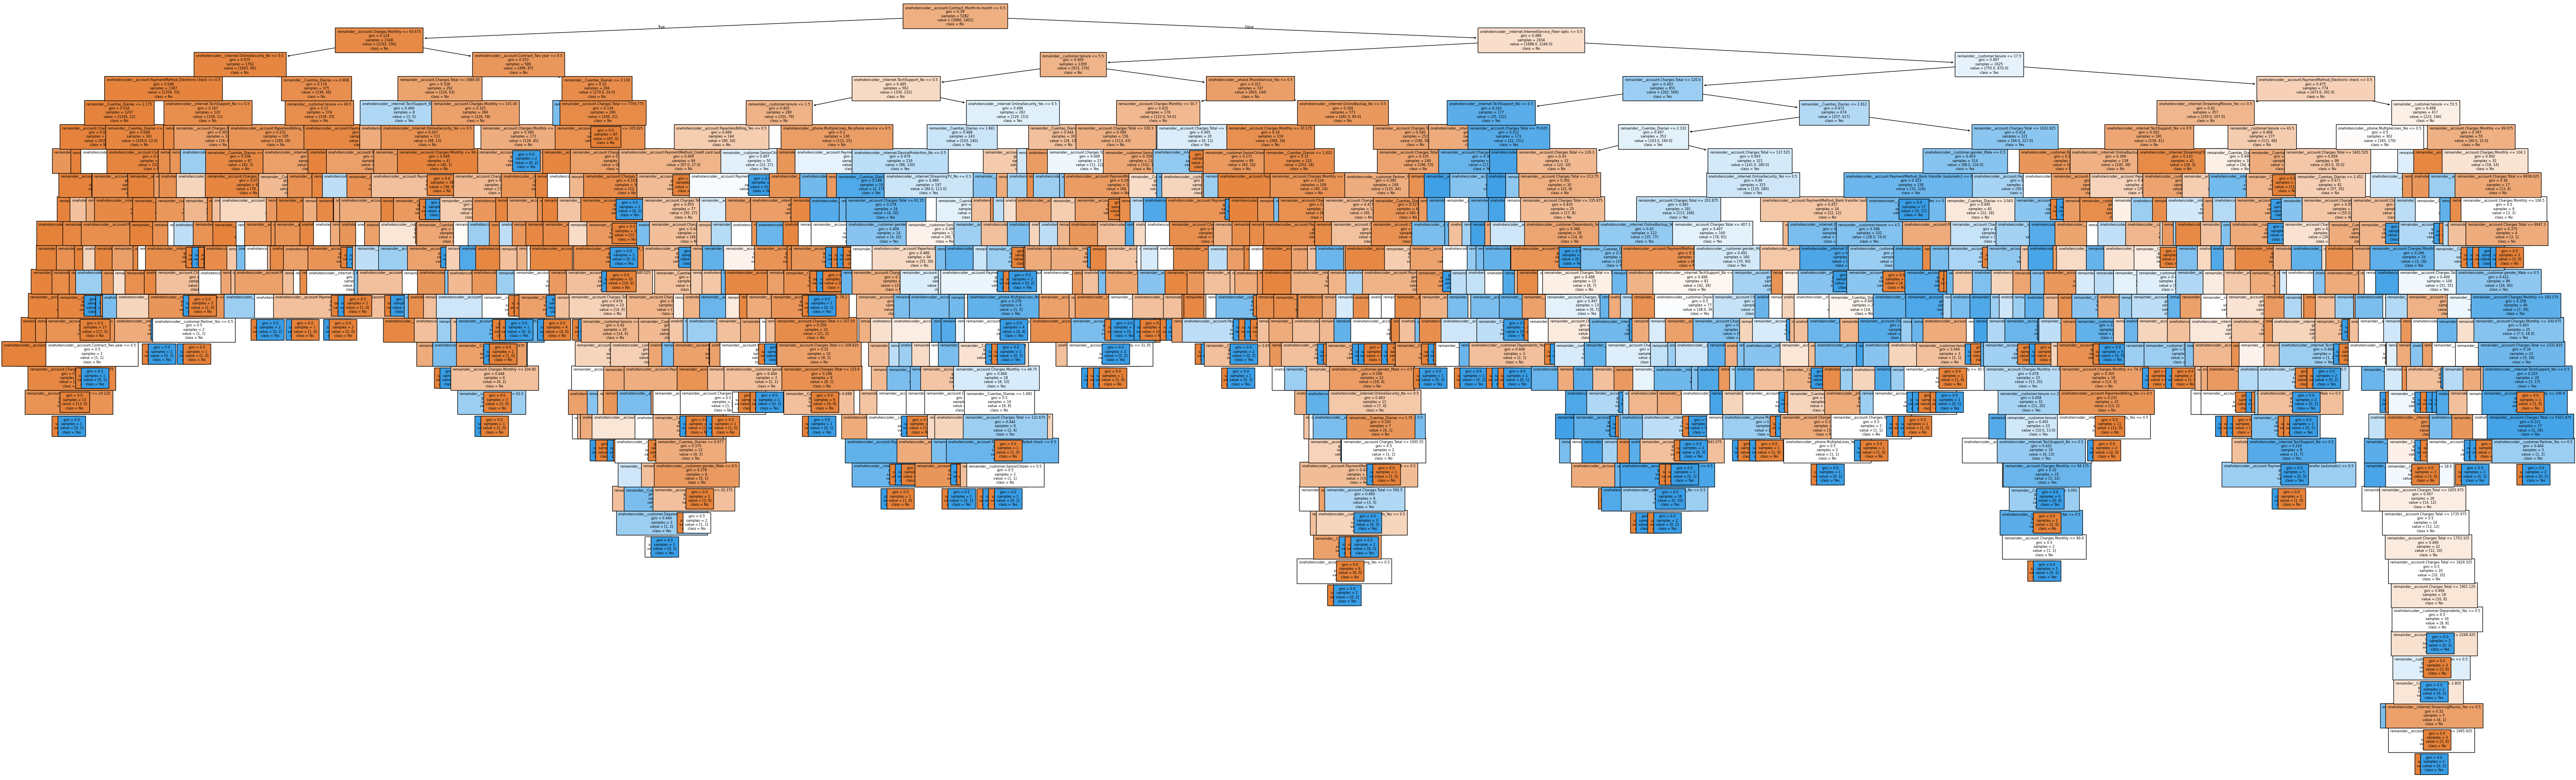

In [84]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True, class_names=['No','Yes'],fontsize=6,feature_names=one_hot.get_feature_names_out(columnas));
plt.show()

In [85]:
modelo_arbol.score(X_train,y_train)

0.9977281332828474

# **Parametrizando el modelo de árbol**

In [98]:
#Vamos a recrear nuestro modelo de arbol
modelo_arbol = DecisionTreeClassifier(max_depth=6, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=5)

In [99]:
modelo_arbol.score(X_test,y_test)

0.797274275979557

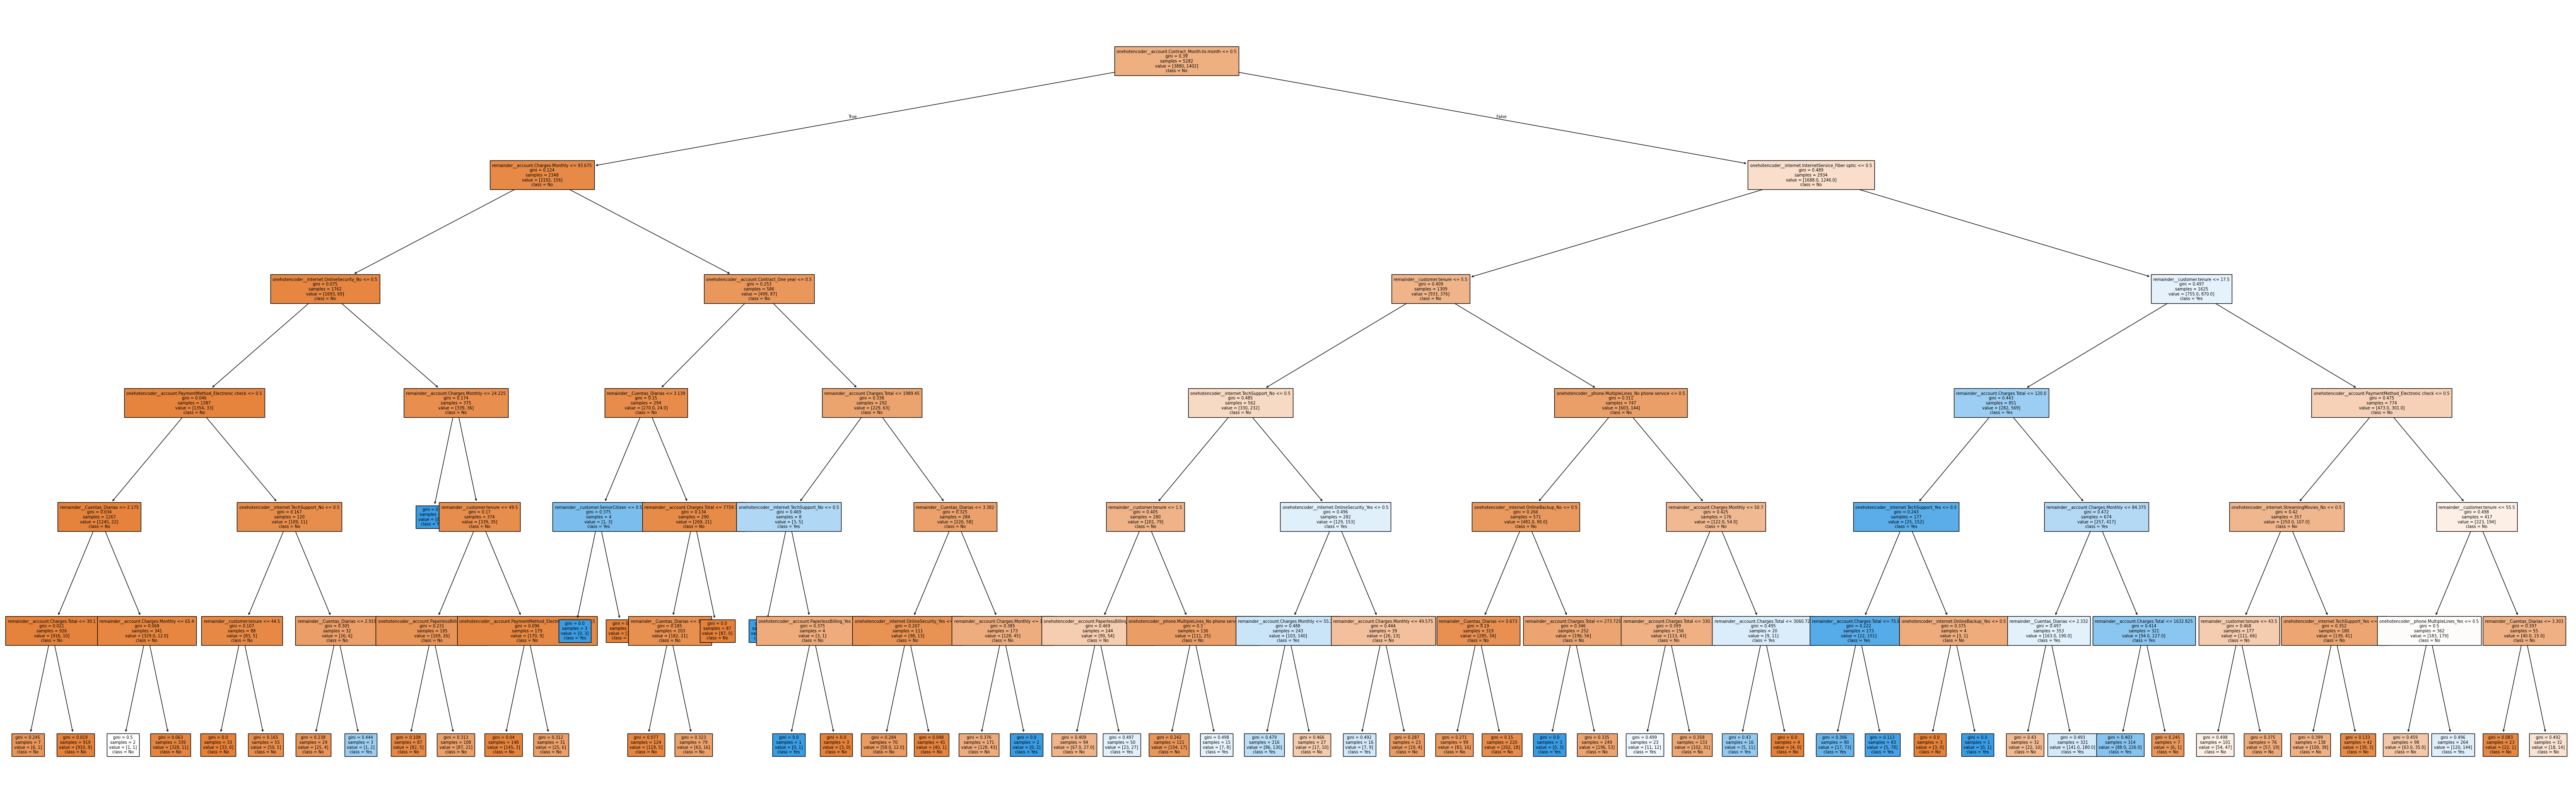

In [108]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True, class_names=['No','Yes'],fontsize=7,feature_names=one_hot.get_feature_names_out(columnas));
plt.show()

In [107]:
modelo_arbol.score(X_train,y_train)

0.811056418023476

# **Verificación de la Proporción de Cancelación (Churn)**

In [113]:
#Verificación de la Proporción de Cancelación (Churn)
pd.Series(y).value_counts(normalize=True)

,proportion
0,0.73463
1,0.26537


# **Normalizando los datos**

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Impute missing values before normalization
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train_imputed)

In [126]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.847222,0.429851,0.430689,0.429851
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.958333,0.429851,0.474544,0.429851
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.652778,0.663682,0.461487,0.663682
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.986111,0.902985,0.881952,0.902985
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.254229,0.060253,0.254229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.375000,0.319403,0.160691,0.319403
5278,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.486111,0.944776,0.449486,0.944776
5279,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.361111,0.331343,0.147311,0.331343
5280,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.041667,0.270647,0.014182,0.270647


# **Modelo KNN**

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier()

In [129]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [132]:
knn.score(normalizacion.transform(imputer.transform(X_test)), y_test)

0.768313458262351

In [133]:
X_test_normalizado = normalizacion.transform(imputer.transform(X_test))

In [134]:
knn.score(X_test_normalizado, y_test)

0.768313458262351

# **Escogiendo el Modelo**

In [135]:
lista = [('dummy',dummy,X_test),('de árbol', modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy es: 0.7348097671777399
La exactitud del modelo de árbol es: 0.797274275979557
La exactitud del modelo knn es: 0.768313458262351


# **Exportacion del modelo de arbol**

In [136]:
import pickle

In [137]:
with open('modelo_onehotencoder.pk1','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [138]:
with open('modelo_champion.pk1','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

# **Conclusion**
Debido a la mentoria de Telexom Part 2 tome la decision de no realizar un balanceo de datos ya que encotre que el modelo al ser pocos datos funcionario con exactitud.

El modelo arbol es el que mas exactiud posee ya que genera un 79% a diferencia de otros modelos que se ha expuesto en este Challanger